##### We are going to create a simple linear regression model that determines the chances of getting admisison into the university.  
* The equation of the regression line is given by:
>  y = b<sub>1</sub>x + b<sub>0</sub>

Where <strong>y</strong> is the _output_ (label) and <strong>x</strong> is the _input_ (feature). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing the dataset.
data = pd.read_csv('graduateAdmissions.csv')
data.head(5)

,GRE Score,Admission
0,337,0.92
1,324,0.76
2,316,0.72
3,322,0.80
4,314,0.65


In [3]:
#Getting information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
GRE Score    400 non-null int64
Admission    400 non-null float64
dtypes: float64(1), int64(1)
memory usage: 6.3 KB


We can see that there are no null values existing in the dataset hence we can proceed to the next step.

###### Assigning the input and outputs (X and y)
* X : input features
* y : output labels

In [4]:
X = data.iloc[ : , 0:1 ].values #Feature matrix
y = data.iloc[ : , 1:2 ].values #Label matrix

##### The feature matrix : 

In [5]:
X[0 : 5]

array([[337],
       [324],
       [316],
       [322],
       [314]], dtype=int64)

###### The label  matrix :

In [6]:
y[ 0 : 5 ]

array([[0.92],
       [0.76],
       [0.72],
       [0.8 ],
       [0.65]])

##### Plotting the feature vs label graph of the dataset

Text(0, 0.5, 'Admission Chances')

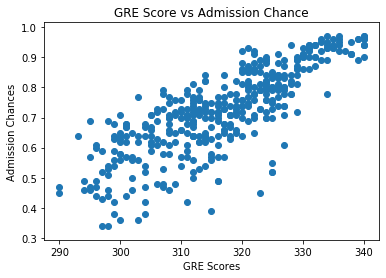

In [7]:
plt.scatter( X, y )
plt.title("GRE Score vs Admission Chance")
plt.xlabel("GRE Scores")
plt.ylabel("Admission Chances")

##### We now need to split the dataset into training and testing dataset

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)

##### We have assigned 80% of the dataset to training and 20% of the dataset to testing

##### Now we have to train our model on the training set using the Linear Regression algorith. Since we have no null or cateogrical values further clensing of the dataset is not required. Also the scikitlearn Linear Regression does the feature scaling for us. Hence manual feature scaling is not required.

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

#Predicting the model on the dataset
y_pred = lr.predict(X_test)

##### Comparing the y_predict and y_test array: 

<img src = "files/Y_Pred-vs-Y_Test.png"/>

##### Let's test the model with a new input of the GRE score and find out what results we get.

In [10]:
greMarks = int(input("Enter the GRE Marks"))
data_new = pd.DataFrame({'GRE Score' : [greMarks]})
print(lr.predict(data_new))

Enter the GRE Marks 325
[[0.8077422]]


##### As we can see that with a GRE Score of 325 we have an 80% chance of getting into the university. The result based on the input seems comparable to the original dataset given to the model. Let us visualize the line of regression on the graph.

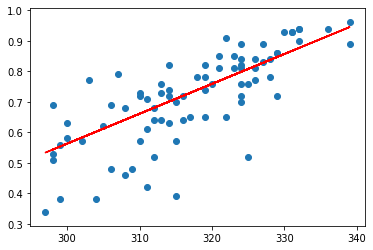

In [16]:
plt.scatter( X_test , y_test)
plt.plot(X_test  , lr.predict(X_test), color = "red")

Hence we can see the line of regression in the graph above. We can see that some of the data points are way too far from the line of regression. This happened because there are various other factors that depend on the admission rather than just the GRE Score of the candidate. Regardless the model has still done a decent enough job to calculate the chances of securing an admission given GRE score as the only input parameter. 